In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [2]:
# Создаём сэмпл
n_samples = 1000

age_owner = np.random.choice(90, n_samples) + 21
length = np.random.choice(120, n_samples) + 15
width = np.random.choice(80, n_samples) + 10

price = length * width * 100 + 126

data = pd.DataFrame({'age_owner': age_owner, 'length': length, 'width': width, 'price': price})
data.head(5)

,age_owner,length,width,price
0,84,104,18,187326
1,106,127,56,711326
2,79,115,36,414126
3,97,35,63,220626
4,74,100,38,380126


In [3]:
from sklearn.metrics import mean_absolute_error

X = data[['age_owner', 'length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['age_owner', 'length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [  80.08533286 4796.85869646 7655.12072278]
Bias: -374148.90623077645
Error: 58665.24123357047


In [4]:
y.median()

308126.0

In [8]:
X = data[['length', 'width']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['length', 'width']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [4796.63664638 7658.89300429]
Bias: -368972.2950720537
Error: 58647.139961701054


In [9]:
# Создаем новый признак
data['mult'] = data['length'] * data['width']
data.head(5)

,age_owner,length,width,price,mult
0,84,104,18,187326,1872
1,106,127,56,711326,7112
2,79,115,36,414126,4140
3,97,35,63,220626,2205
4,74,100,38,380126,3800


In [10]:
X = data[['mult']]
y = data['price']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['mult']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [100.]
Bias: 125.99999999988358
Error: 8.540155249647797e-11


# ДЗ , попробуем создать базу данных суммарного дохода фильмов  исходя из  ,,  бюджета ,, цен билетов и количества просмотров

In [23]:
n_samples = 5600
raiting_critic = np.random.choice(100, n_samples)
ticket_price = np.random.choice(10, n_samples) + 10
film_budget = np.random.choice(500000, n_samples) + np.random.choice(20000, n_samples) + 100000
sum_shows = np.random.choice(5000000, n_samples) + 5000000

# Добавим ещё столбец с рейтингом 

In [24]:
money = (ticket_price * sum_shows ) - film_budget - 50000

# Создаём датафрейм

In [25]:
data = pd.DataFrame({'raiting_critic' : raiting_critic , 'ticket_price': ticket_price, 'film_budget': film_budget, 'sum_shows': sum_shows, 'money': money})
data.head(5)

,raiting_critic,ticket_price,film_budget,sum_shows,money
0,41,11,103922,8615318,94614576
1,31,11,425734,5652375,61700391
2,70,10,273005,5109213,50769125
3,9,19,146784,5434909,103066487
4,91,13,410175,6080462,78585831


In [26]:
import seaborn as sns

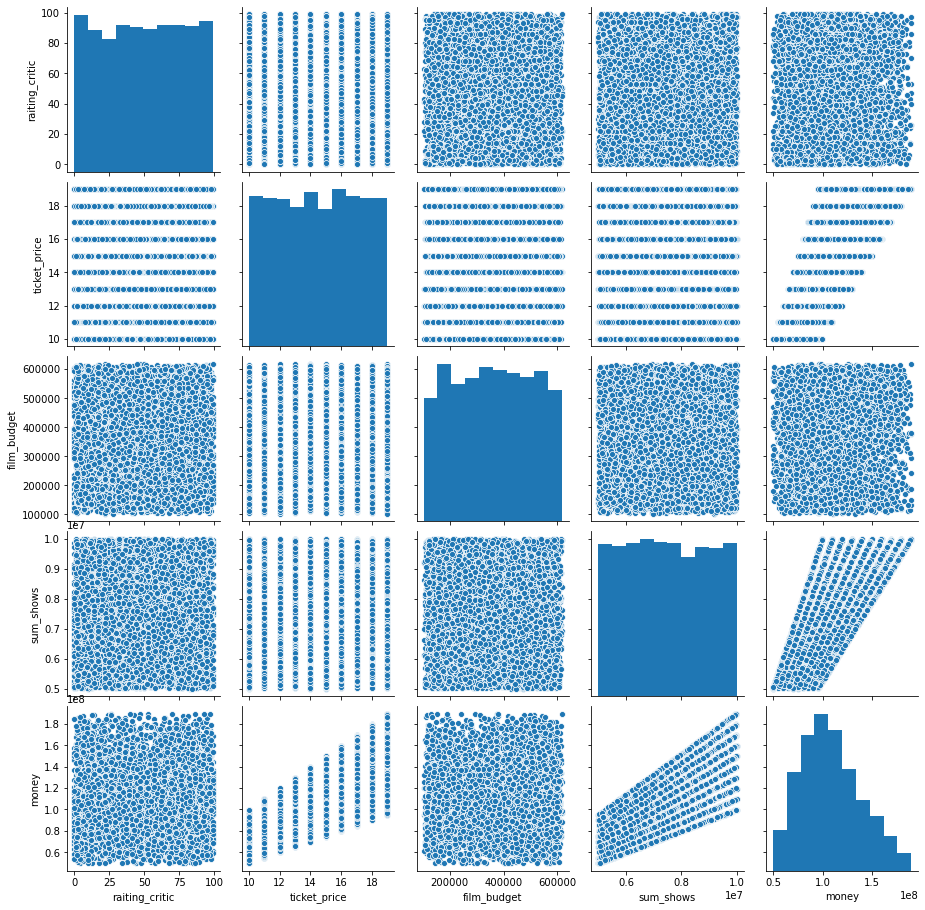

In [27]:
sns_plot = sns.pairplot(
    data)
sns_plot

# видим существование определённой зависимости от цены билета , количества показов и заработанных денег 

# Пытаемся обучить модель "влоб" 

In [30]:
data.columns

Index(['raiting_critic', 'ticket_price', 'film_budget', 'sum_shows', 'money'], dtype='object')

In [31]:
from sklearn.metrics import mean_absolute_error

X = data[['raiting_critic', 'ticket_price', 'film_budget', 'sum_shows']]
y = data['money']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['raiting_critic', 'ticket_price', 'film_budget', 'sum_shows']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 2.11276922e+03  7.48222532e+06 -5.68165327e-01  1.45260820e+01]
Bias: -109017007.53551489
Error: 3147395.288273764


# получилась практически бесполезная модель. Но наблюдая подобие  линейной зависимоти в таблице между двумя признаками пытаемся определить её

In [33]:
data['sbory'] = data['ticket_price'] * data['sum_shows']
data.head()

,raiting_critic,ticket_price,film_budget,sum_shows,money,sbory
0,41,11,103922,8615318,94614576,94768498
1,31,11,425734,5652375,61700391,62176125
2,70,10,273005,5109213,50769125,51092130
3,9,19,146784,5434909,103066487,103263271
4,91,13,410175,6080462,78585831,79046006


In [35]:
X = data[['raiting_critic', 'film_budget', 'sbory']]
y = data['money']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['raiting_critic', 'film_budget', 'sbory']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [ 2.55793541e-11 -1.00000000e+00  1.00000000e+00]
Bias: -50000.0000000447
Error: 8.174351283482143e-09


# получилась вполне приемлимая модель , даже несмотря на то , что всё равно остался один бесполезный столбец. Глядя на веса , мы мыожем увидеть  ,что его вес стремиться к массе протона ( -11 против - 29, правда , но не суть.....) 

# А теперь поробуем и вовсе убрать "бесполезный" признак 

In [36]:
X = data[['film_budget', 'sbory']]
y = data['money']
reg = LinearRegression().fit(X, y)
print('Weights: {}'.format(reg.coef_))
print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(data[['film_budget', 'sbory']])
print('Error: {}'.format(mean_absolute_error(pred_values, y)))

Weights: [-1.  1.]
Bias: -50000.000000074506
Error: 1.5803213630403792e-08


Таке 